In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# EXERCISE 1

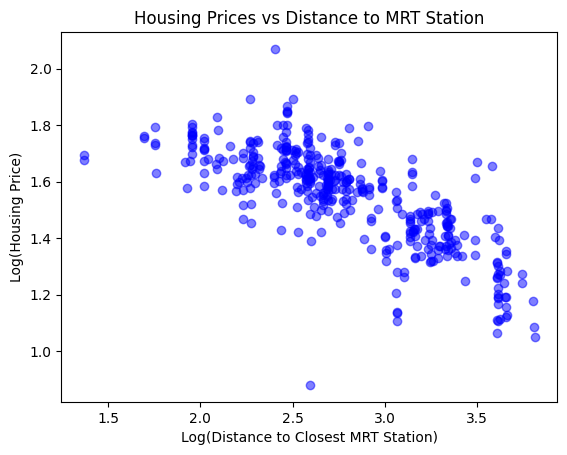

In [ ]:
# 1

# Setup
df1 = pd.read_excel('RealEstate.xlsx')
x = np.array(df1['distance_closest_MRT_station']).reshape(-1,1)
const = np.ones(x.shape).reshape(-1,1)
features = np.block([const, x])
y = np.array(df1['housing_price'])

# Plot
plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.xlabel('Log(Distance to Closest MRT Station)')
plt.ylabel('Log(Housing Price)')
plt.title('Housing Prices vs Distance to MRT Station')
plt.show()

The code below performs gradient descent (GD) with backtracking line search (BLS). The cost function that I want to minimize is simply the mean squared error given by
\begin{gather*}
J(\theta) = \frac{1}{N} \sum_{i = 1}^{N} (y_i - \theta_0 - x_i \theta_1)^2
\end{gather*}
where $y_i$ is the house price of observation $i$ and $x_i$ is the distance to closest MRT. $\theta_0, \theta_1$ represent the intercept and the coefficient of interest respectively. \\
The gradient of the cost function with respect to $\theta_0$ is
\begin{gather*}
  \frac{-2}{N} \sum_{i = 1}^N (y_i - \theta_0 - x_i \theta_1)
\end{gather*}
The gradient of the cost function with respect to $\theta_1$ is
\begin{gather*}
  \frac{-2}{N} \sum_{i = 1}^N (y_i - \theta_0 - x_i \theta_1) (x_i)
\end{gather*}
Concisely, the gradient vector can be written as
\begin{gather*}
  \nabla J(\theta) = \frac{-2}{N} \begin{bmatrix}
   \sum_{i = 1}^N (y_i - \theta_0 - x_i \theta_1) \\
   \sum_{i = 1}^N (y_i - \theta_0 - x_i \theta_1)(x_i)
   \end{bmatrix}
\end{gather*}
The GD + BLS algorithm goes as follows:

1. Initialize step-size $\alpha = 1$ and parameters $\mu = 0.45, \beta = 0.75$. Set tolerance to 1e-5 and allow maximum iterations of 5000.
2. Take an initial guess $\theta_{guess}$ and compute $\nabla J(\theta)$ at $\theta = \theta_{guess}$.
3. Update the $\alpha$ using BLS. In particular, while $J(\theta_{guess} - \alpha \nabla J(\theta)) > J(\theta_{guess}) - \alpha \mu \| \nabla J(\theta) \|^2$, update $\alpha = \beta \alpha$.
4. Compute $\theta_{update} \; $ as follows
\begin{gather*}
\theta_{update} = \theta_{guess} - \alpha \nabla J(\theta)
\end{gather*}
5. If $\|\theta_{update} - \theta_{guess}\| <$ tolerance, stop the algorithm. Else continue with the iterations by setting $\theta_{guess} = \theta_{update} \; $ and repeating the previous steps again.



In [ ]:
# 2

# Linear regression through gradient descent + BLS
def cost(parameters):
  return np.sum((y - features @ parameters)**2) / len(y)

def grad_cost(parameters):
  return (-2 * (y - features @ parameters) @ features) / len(y)

max_iters = 5000
para_init = np.array([50,50])
tolerance = 1e-5
alpha = 1
beta = 0.75
mu = 0.45
loss_list = []

# BLS FTW ALWAYS!!!
for iter in range(max_iters):
  while cost(para_init - alpha*grad_cost(para_init)) > cost(para_init) - alpha * mu * np.sum(grad_cost(para_init)**2):
    alpha = alpha*beta

  para_update = para_init - alpha*grad_cost(para_init)
  loss_list.append(cost(para_update))
  if np.linalg.norm(para_update - para_init) < tolerance:
    break
  para_init = para_update

print(f'optimized parameters: {para_init}, loss: {cost(para_init)}, iterations taken: {iter}')

optimized parameters: [ 2.29246857 -0.26780248], loss: 0.01220437561815445, iterations taken: 3030


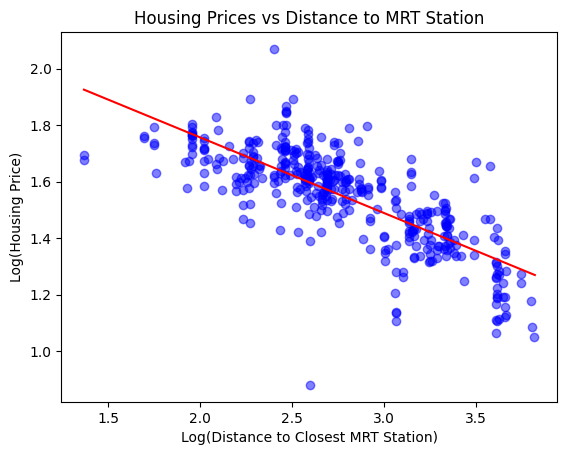

In [ ]:
# 3

# Data + regression results
x_in = np.arange(x.min(), x.max() + 0.05, 0.05)
y_out = para_init[0] + x_in*para_init[1]

plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.plot(x_in, y_out, color = 'red')
plt.xlabel('Log(Distance to Closest MRT Station)')
plt.ylabel('Log(Housing Price)')
plt.title('Housing Prices vs Distance to MRT Station')
plt.show()

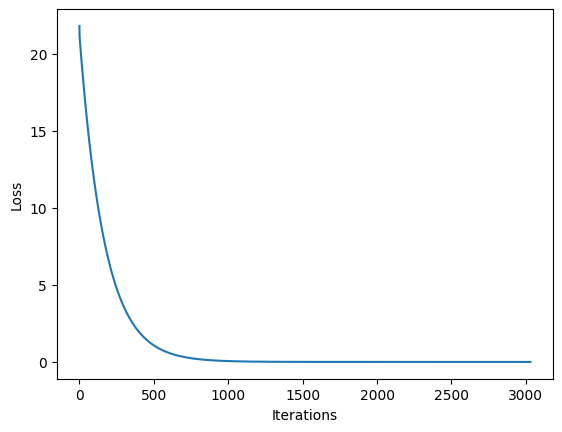

In [ ]:
# 3

# Cost function
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

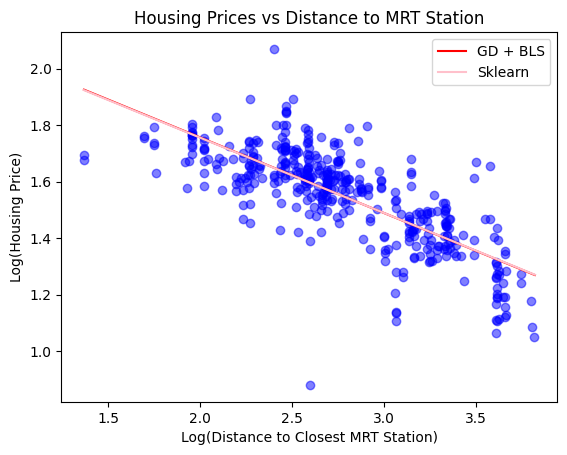

In [ ]:
# 4

# Inbuilt command result
model = LinearRegression()
model.fit(x, y)

y_out_sk = model.intercept_ + x_in*model.coef_[0]

x_in = np.arange(x.min(), x.max() + 0.05, 0.05)
y_out = para_init[0] + x_in*para_init[1]

plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.plot(x_in, y_out, color = 'red', label = 'GD + BLS')
plt.plot(x_in, y_out_sk, color = 'pink', label = 'Sklearn')
plt.xlabel('Log(Distance to Closest MRT Station)')
plt.ylabel('Log(Housing Price)')
plt.legend()
plt.title('Housing Prices vs Distance to MRT Station')
plt.show()

Both the manual optimization as well as Scikitlearn's optimization return almost equivalent results, leading to the overlapping regression lines in the graph above.

In [ ]:
# 5

def price_pred(mrt_dist, parameters):
  # originally, log(price)_i_pred = constant + log(dist)_i * coeff, so we exponentiate to get the true price
  return np.exp(parameters[0] + np.log(mrt_dist) * parameters[1])

# Assuming the distance in the dataset is in m, not km
print(f'predicted price with MRT distance = 50 m is {price_pred(50, para_init)}')
print(f'predicted price with MRT distance = 350 m is {price_pred(350, para_init)}')

predicted price with MRT distance = 50 m is 3.472306574058718
predicted price with MRT distance = 350 m is 2.0620477065962644


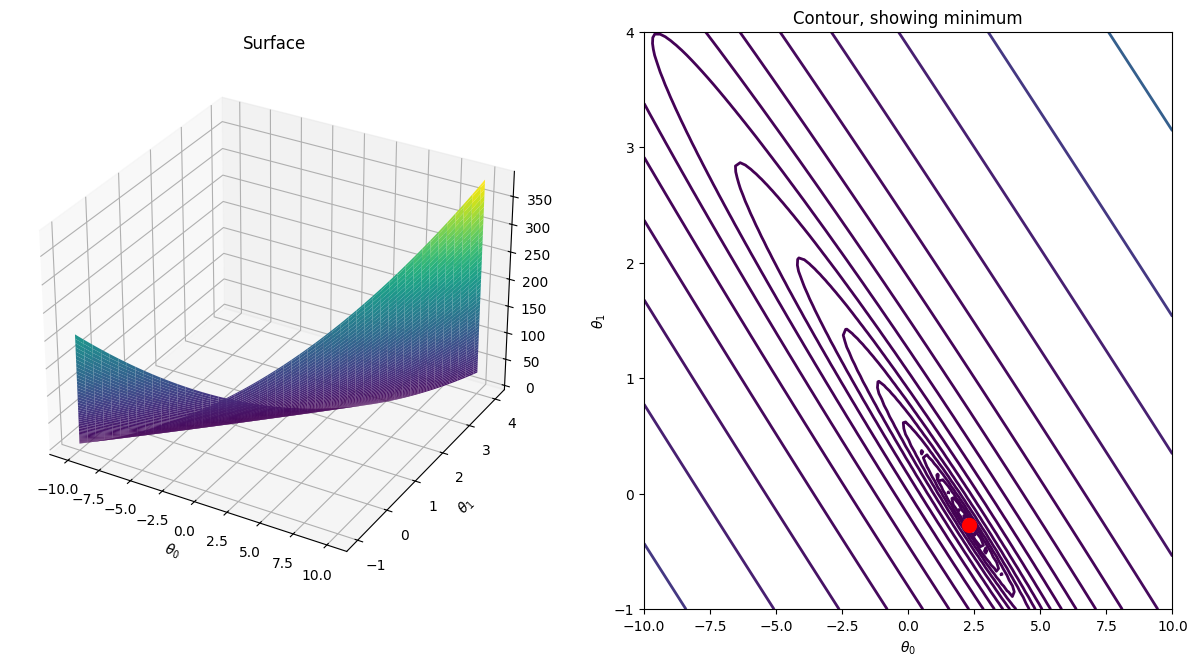

In [ ]:
# 6

# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
  for j, theta1 in enumerate(theta1_vals):
    J_vals[i, j] = cost(np.array([theta0, theta1]))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize = (15, 7.5))
ax = fig.add_subplot(1,2,1, projection = '3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap = 'viridis')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Surface')
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths = 2, cmap='viridis', levels = np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(para_init[0], para_init[1], 'ro', ms = 10, lw = 2)
plt.title('Contour, showing minimum')
plt.show()

The code in the previous cell returns a plot of the cost function for different combinations of the intercept and coefficient of interest. On the left hand, we have the function in 3-dimensional space, where the parameters are on the x and y axes, while the cost function is on the z axis. The right hand figure plots the exact same thing but a 2-dimensional plane, with contours representing the levels of the cost function. Notice that the level sets get tighter the closer we get to the local optimal, which follows the theoretical prediction one would make using the first order condition.

# EXERCISE 2

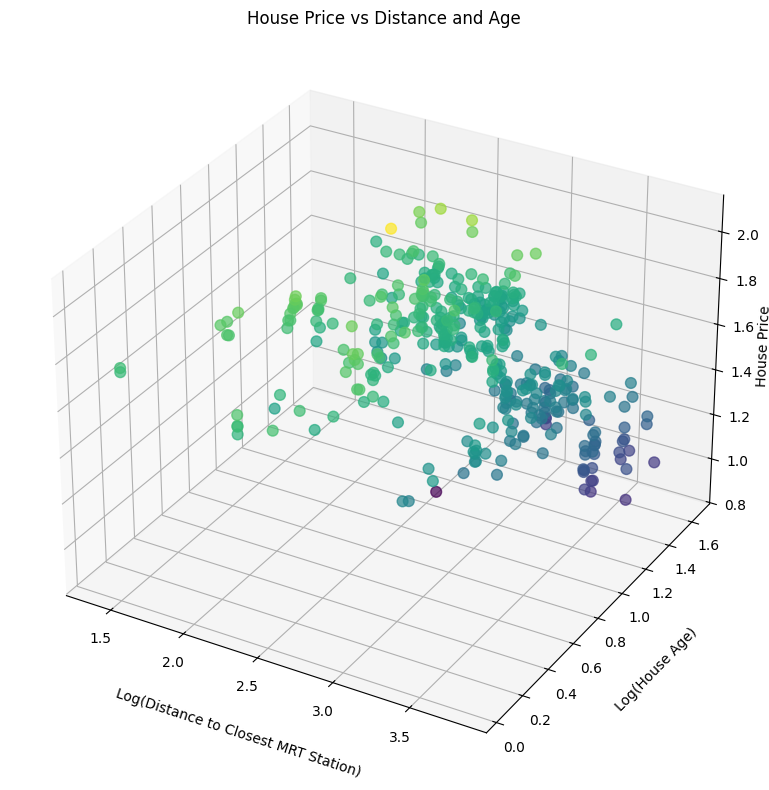

In [ ]:
# 1

# Setup
df2 = pd.read_excel('RealEstate3.xlsx')
x = np.array(df2[['distance_closest_MRT_station', 'house_age']])
const = np.ones(x.shape[0]).reshape(-1, 1)
features = np.block([const, x])
y = np.array(df2['house_price'])

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection = '3d')

sc = ax.scatter(x[:, 0], x[:, 1], y, c = y, cmap = 'viridis', s = 60, alpha = 0.7)

ax.set_xlabel('Log(Distance to Closest MRT Station)', labelpad = 15)
ax.set_ylabel('Log(House Age)', labelpad = 15)
ax.set_zlabel('House Price', labelpad = 0)
ax.set_title('House Price vs Distance and Age')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


In [ ]:
# 2

def cost(parameters):
  return np.sum((y - features @ parameters)**2) / len(y)

def grad_cost(parameters):
  return (-2*(y - features @ parameters) @ features) / len(y)

# 3

# Linear regression through gradient descent + BLS
max_iters = 5000
para_init = np.array([50,50,50])
tolerance = 1e-5
alpha = 1
beta = 0.75
mu = 0.45
loss_list = []

# BLS FTW ALWAYS!!!
for iter in range(max_iters):
  while cost(para_init - alpha*grad_cost(para_init)) > cost(para_init) - alpha * mu * np.sum(grad_cost(para_init)**2):
    alpha = alpha*beta

  para_update = para_init - alpha*grad_cost(para_init)
  loss_list.append(cost(para_update))
  if np.linalg.norm(para_update - para_init) < tolerance:
    break
  para_init = para_update

print(f'optimized parameters: {para_init}, loss: {cost(para_init)}, iterations taken: {iter}')

optimized parameters: [ 2.33446968 -0.25765169 -0.06323945], loss: 0.011640815535222988, iterations taken: 4459


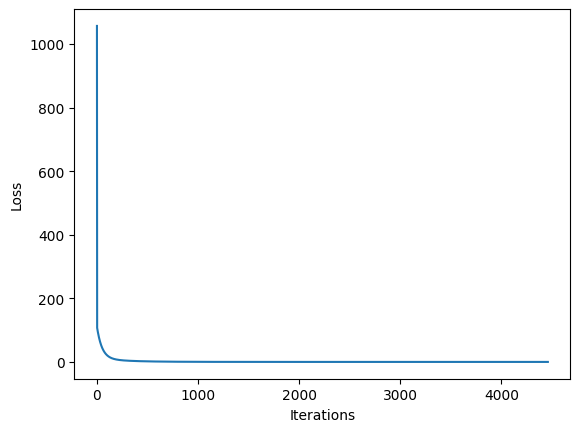

In [ ]:
# 4

# Cost function
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

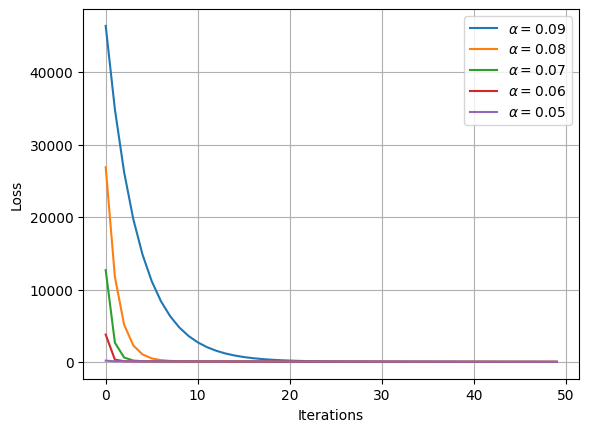

In [ ]:
# 5 Cost functions changing as a function of constant step-size(learning rate)

def loss_function_alpha_param(alpha):
  max_iters = 5000
  para_init = np.array([50,50,50])
  tolerance = 1e-5
  loss_list = []

  for iter in range(max_iters):
    para_update = para_init - alpha*grad_cost(para_init)
    loss_list.append(cost(para_update))
    if np.linalg.norm(para_update - para_init) < tolerance:
      break
    para_init = para_update

  return loss_list

alphas = [0.09, 0.08, 0.07, 0.06, 0.05]

for alpha in alphas:
    plt.plot(loss_function_alpha_param(alpha)[:50], label=fr'$\alpha = {alpha}$')

plt.xlabel('Iteration')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot above shows that the smaller the step-size, the quicker the convergence is achieved. Note that as long as the step-size is below roughly 0.1, convergence is achieved very quickly, even though the initial guess is far away from the optimal parameter vector. However, if the alpha is more than 0.1, there are numerical issues. I think that this can be fixed by changing the cost function itself. If I replace $N$ in the denominator with $hN$, where $h$ is some integer greater than 1, then I am able to trace out paths for loss function paths with higher $\alpha$ as well.